In [1]:
!pip install umap-learn -q
# !pip install umap-learn[plot] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1CQgnLkSVKEPpm9NPLW03scyQy8aRp0qe/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1mBD0zUCuYHtWsRcp6wkWiP76qpCeQkYY/view?usp=sharing!gdown
!gdown --fuzzy https://drive.google.com/file/d/17D7MuSJpVjYBafeeFYaDw-a6Mk5Laa7B/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1O_2vgPYdYzJrobKahyiReaepFi1kbhvY/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1uq3_eOzI7xN5mYE8EEsC4-jnrIZfBEig/view?usp=sharing
!gdown --fuzzy  https://drive.google.com/file/d/1LXStpb_gN4xfPYu0YG4eBSZiENz4DPrV/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1pITo9Bs4OLLGpYkomjvX4-R7gHPhfGkr/view?usp=sharing

# label = pd.read_csv("./PMDA2023_Labels.csv", sep=',')
# phenoData = pd.read_csv("./2022-02-18-TeraTox-commercial-phenoData.txt", sep='\t')
# phenoData
# pScoreData = pd.read_csv("./2022-02-18-TeraTox-commercial-pScore.gct", sep='\t',skiprows=2)
# logFCdata = pd.read_csv("./2022-02-18-TeraTox-commercial-logFC.gct", sep='\t',skiprows=2)

Downloading...
From: https://drive.google.com/uc?id=1CQgnLkSVKEPpm9NPLW03scyQy8aRp0qe
To: /content/2022-02-18-TeraTox-commercial-logFC.gct
100% 4.88M/4.88M [00:00<00:00, 88.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mBD0zUCuYHtWsRcp6wkWiP76qpCeQkYY
To: /content/2022-02-18-TeraTox-commercial-pScore.gct
100% 4.70M/4.70M [00:00<00:00, 29.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=17D7MuSJpVjYBafeeFYaDw-a6Mk5Laa7B
To: /content/2022-02-18-TeraTox-commercial-featureData.txt
100% 72.8k/72.8k [00:00<00:00, 71.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O_2vgPYdYzJrobKahyiReaepFi1kbhvY
To: /content/2022-02-18-TeraTox-commercial-phenoData.txt
100% 21.4k/21.4k [00:00<00:00, 42.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uq3_eOzI7xN5mYE8EEsC4-jnrIZfBEig
To: /content/2021-06-10-gcGeneFactorAnno-withPositiveCoefs.tsv
100% 6.98k/6.98k [00:00<00:00, 19.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LXStpb_gN4xfPYu0YG4eBSZiEN

In [4]:
featureData = pd.read_csv("./2022-02-18-TeraTox-commercial-featureData.txt", sep='\t')
featureData
feature_names = featureData["FeatureName"].tolist()

## Add human vs mouse label

In [5]:

RAW_data = pd.read_csv("./GSE183534_FactorAnalysis-DGEList.gct", sep='\t',skiprows=2).T

new_labels = []

for a in list(RAW_data.index):
  if a[0] == 'h':
    if a.split('.')[-1] == 'DMSO':
      label = 'DMSO'
    else:
      label = a.split('.')[-2]
  elif a[0] == 'M':
    label = a.split('_')[-2]
  else:
    label = '/'
  new_labels.append(label)

RAW_data['label'] = new_labels

RAW_data.columns = RAW_data.iloc[0]

#RAW_data


In [6]:
species = []

for a in list(RAW_data.index):
  if a[0] == 'h':
    sp = 'human'
  elif a[0] == 'M':
    sp = 'mouse'
  else:
    sp = 'non'
  species.append(sp)

RAW_data['species'] = species

RAW_data.columns = RAW_data.iloc[0]

#RAW_data

In [7]:
#feature_names

In [8]:
RAW_data1215 = RAW_data[feature_names]
RAW_data1215.shape

label_for_raw_data1215 = RAW_data['/']#.tolist
label_for_raw_data1215 = label_for_raw_data1215.iloc[2:]
label_for_raw_data1215

M1_1_DMSO_ctrl                            DMSO
M1_2_DMSO_ctrl                            DMSO
M1_3_DMSO_ctrl                            DMSO
M1_4_DMSO_ctrl                            DMSO
M1_5_DMSO_ctrl                            DMSO
                                        ...   
hEST_N_18_541_hEST_N_18.Warfarin.2    Warfarin
hEST_N_18_529_hEST_N_18.Warfarin.3    Warfarin
hEST_N_18_517_hEST_N_18.Warfarin.4    Warfarin
hEST_N_18_505_hEST_N_18.Warfarin.5    Warfarin
hEST_N_18_493_hEST_N_18.Warfarin.6    Warfarin
Name: /, Length: 1055, dtype: object

In [9]:
human_raw_data = RAW_data1215.iloc[[i for i, a in enumerate(list(RAW_data1215.index)) if a.startswith('h')]]
mouse_raw_data = RAW_data1215.iloc[[i for i, a in enumerate(list(RAW_data1215.index)) if a.startswith('M')]]
human_label = label_for_raw_data1215.iloc[[i for i, a in enumerate(list(label_for_raw_data1215.index)) if a.startswith('h')]]
mouse_label = label_for_raw_data1215.iloc[[i for i, a in enumerate(list(label_for_raw_data1215.index)) if a.startswith('M')]]


human_raw_data_plain = human_raw_data.to_numpy()
mouse_raw_data_plain = mouse_raw_data.to_numpy()
raw_data_plain = RAW_data1215.to_numpy()[2:, :] # remove header

assert mouse_label.shape[0] == mouse_raw_data_plain.shape[0]
assert human_label.shape[0] == human_raw_data_plain.shape[0]
assert label_for_raw_data1215.shape[0] == raw_data_plain.shape[0]



In [10]:
human_raw_data_plain = StandardScaler().fit_transform(human_raw_data_plain)
mouse_raw_data_plain = StandardScaler().fit_transform(mouse_raw_data_plain)
raw_data_plain = StandardScaler().fit_transform(raw_data_plain)

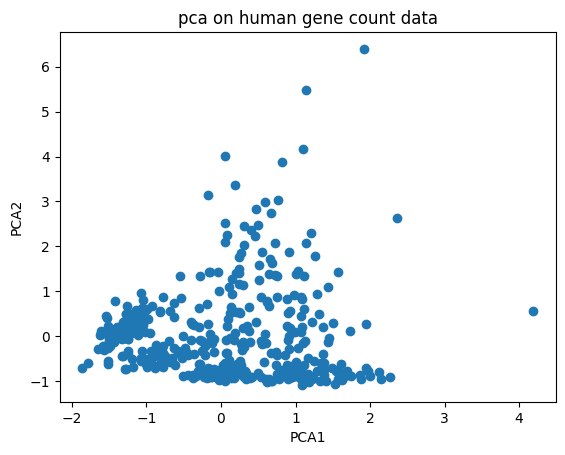

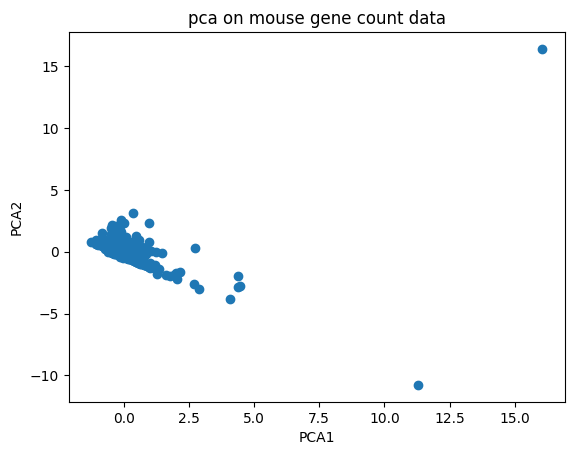

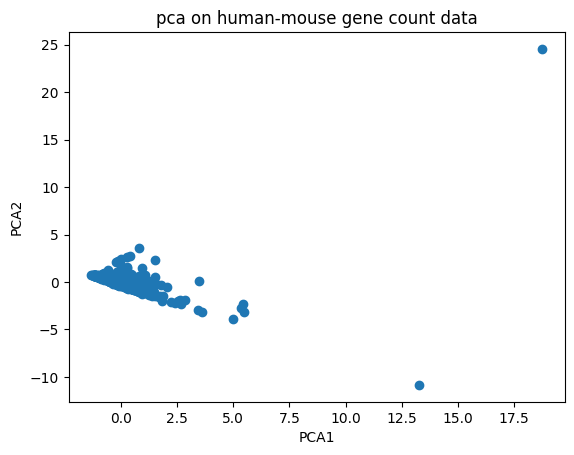

In [11]:

for data_fold in ['human', 'mouse', 'human-mouse']:

  pca = PCA(n_components=2, whiten=True)

  if data_fold == 'human':
    X = human_raw_data_plain
  elif data_fold == 'mouse':
    X = mouse_raw_data_plain
  elif data_fold == 'human-mouse':
    X = raw_data_plain

  plt.figure()
  pcs = pca.fit_transform(X=X)
  plt.scatter(pcs[:, 0], pcs[:, 1] )
  plt.xlabel('PCA1')
  plt.ylabel('PCA2')
  plt.title(f'pca on {data_fold} gene count data')

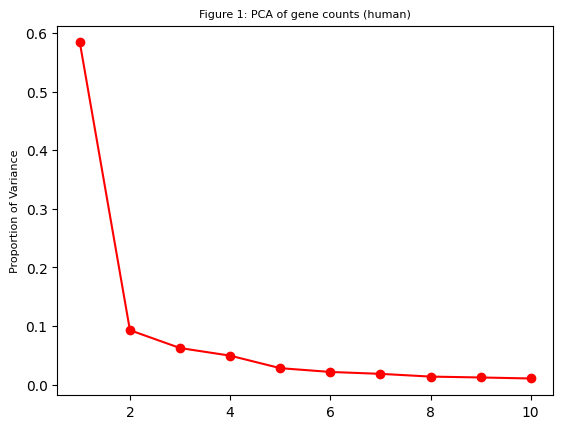

In [12]:
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(human_raw_data_plain)

prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: PCA of gene counts (human)', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

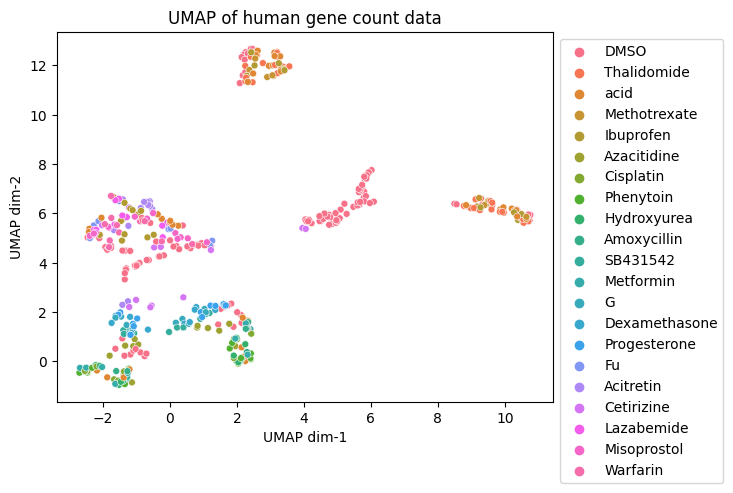

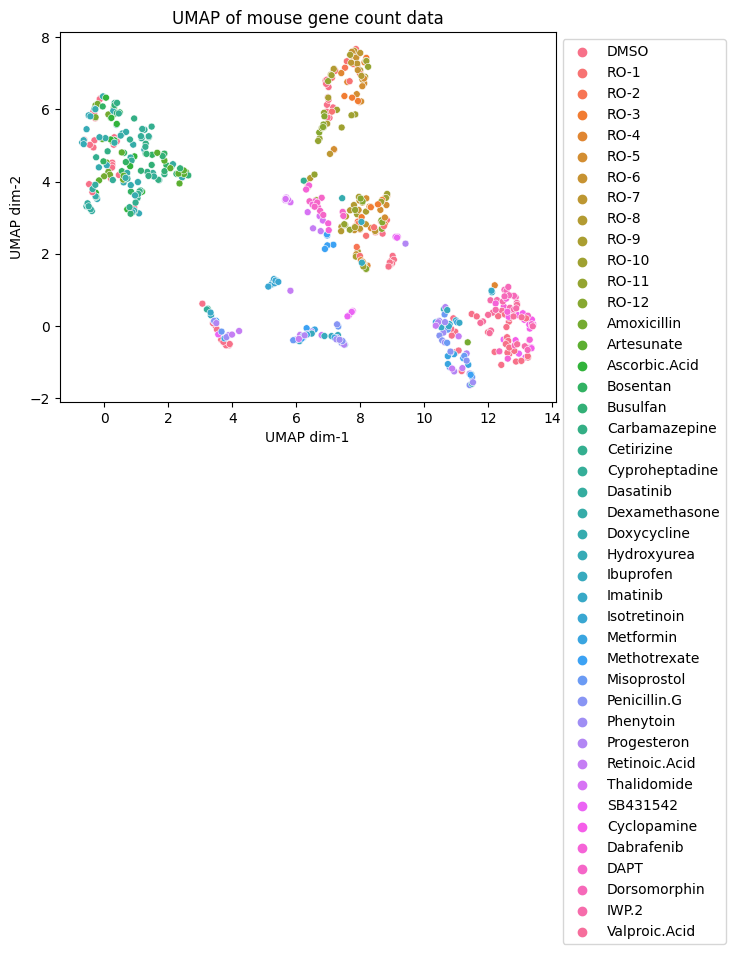

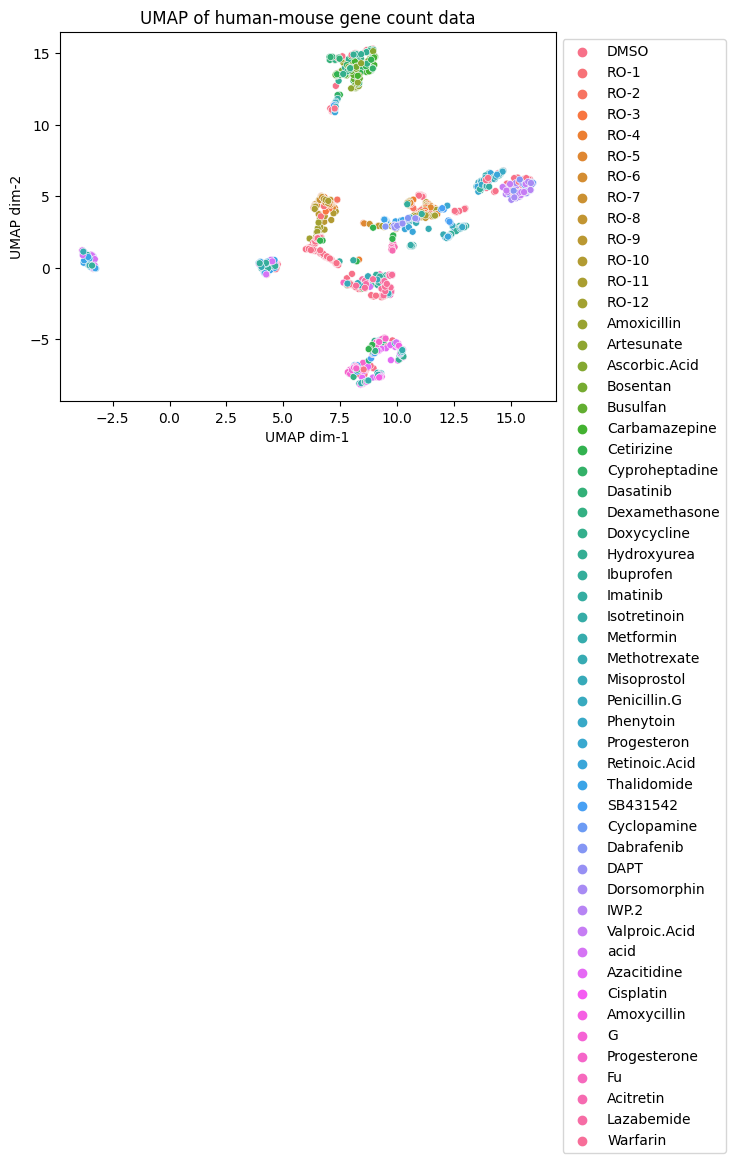

In [13]:

for data_fold in ['human', 'mouse', 'human-mouse']:
  mapper = umap.UMAP(random_state=42)

  if data_fold == 'human':
    X = human_raw_data_plain
    hue = human_label.tolist()
  elif data_fold == 'mouse':
    X = mouse_raw_data_plain
    hue = mouse_label.tolist()
  elif data_fold == 'human-mouse':
    X = raw_data_plain
    hue = label_for_raw_data1215.tolist()

  map = mapper.fit_transform(X)

  plt.figure()
  ax = sns.scatterplot(x=map[:, 0], y=map[:, 1], s = 25, hue=hue)
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
  plt.xlabel('UMAP dim-1')
  plt.ylabel('UMAP dim-2')
  plt.title(f'UMAP of {data_fold} gene count data')


In [14]:
RAW_data = RAW_data.rename(columns={"non":"species"})

In [15]:
species_label = RAW_data['species']#.tolist
species_label = species_label.iloc[2:]
species_label

M1_1_DMSO_ctrl                        mouse
M1_2_DMSO_ctrl                        mouse
M1_3_DMSO_ctrl                        mouse
M1_4_DMSO_ctrl                        mouse
M1_5_DMSO_ctrl                        mouse
                                      ...  
hEST_N_18_541_hEST_N_18.Warfarin.2    human
hEST_N_18_529_hEST_N_18.Warfarin.3    human
hEST_N_18_517_hEST_N_18.Warfarin.4    human
hEST_N_18_505_hEST_N_18.Warfarin.5    human
hEST_N_18_493_hEST_N_18.Warfarin.6    human
Name: species, Length: 1055, dtype: object

Text(0.5, 1.0, 'UMAP of gene counts')

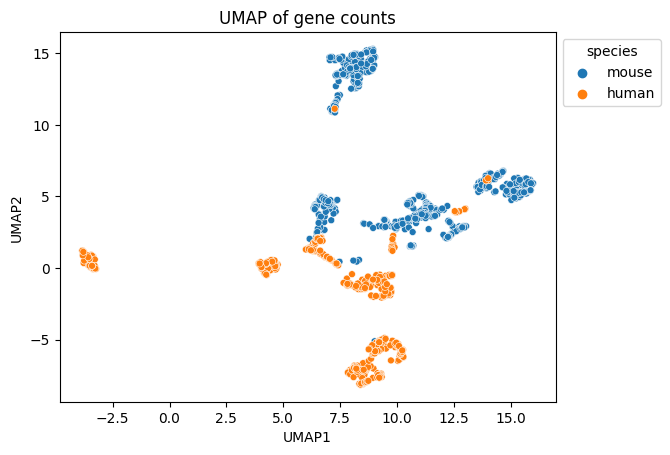

In [16]:
emedding = umap.UMAP(random_state=42).fit_transform(raw_data_plain)

emedding.shape

ax = sns.scatterplot(x=emedding[:, 0], y=emedding[:, 1], hue=species_label, s = 25)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='10') # for legend title
# Set x-axis label
plt.xlabel('UMAP1')
# Set y-axis label
plt.ylabel('UMAP2')
plt.title('UMAP of gene counts')